# Bone Fracture Detection using Grayscale Morphology (OpenCV)

In [ ]:
## Dr. Michael Mahesh K Saveetha Engineering College
- michaelmaheshk@gmail.com 
- 19AI406- Digital Image Processing 
- Unit - 2 
- 04/05
- EVEN SEM ( Slot: 4Z4-1 & 4U2-1)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Read the X-ray image in grayscale
image = cv2.imread("image1.png", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512, 512))  # Resize for uniformity

In [3]:
# Step 2: Enhance contrast using Histogram Equalization
equalized = cv2.equalizeHist(image)

In [4]:
# Step 3: Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(equalized, (3, 3), 0)

In [5]:
# Step 4: Apply Morphological Gradient (dilation - erosion)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph_gradient = cv2.morphologyEx(blurred, cv2.MORPH_GRADIENT, kernel)

In [6]:
# Step 5: Apply Canny edge detection
edges = cv2.Canny(morph_gradient, threshold1=50, threshold2=150)

In [7]:
# Step 6: Draw contours around suspected fracture areas
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

for cnt in contours:
    area = cv2.contourArea(cnt)
    if 100 < area < 1000:  # Heuristic: filter small areas
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(output, (x, y), (x+w, y+h), (0, 0, 255), 2)

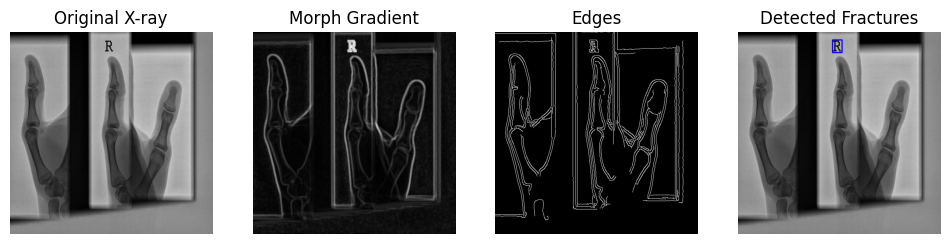

In [8]:
# Step 7: Show the results

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original X-ray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(morph_gradient, cmap='gray')
plt.title('Morph Gradient')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(output, cmap='gray')
plt.title('Detected Fractures')
plt.axis('off')

plt.show()
